# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

     pcost       dcost       gap    pres   dres
 0: -1.2293e+01 -2.8391e+01  1e+02  1e+01  2e+00
 1: -2.5419e+01 -3.4794e+01  3e+01  3e+00  5e-01
 2: -3.6313e+01 -4.5893e+01  3e+01  2e+00  4e-01
 3: -4.3790e+01 -4.5825e+01  8e+00  4e-01  7e-02
 4: -4.3706e+01 -4.3902e+01  5e-01  2e-02  4e-03
 5: -4.3700e+01 -4.3727e+01  3e-02  5e-05  8e-06
 6: -4.3721e+01 -4.3723e+01  1e-03  2e-06  4e-07
 7: -4.3723e+01 -4.3723e+01  1e-05  2e-08  4e-09
 8: -4.3723e+01 -4.3723e+01  1e-07  2e-10  4e-11
 9: -4.3723e+01 -4.3723e+01  1e-09  2e-12  4e-13
Optimal solution found.


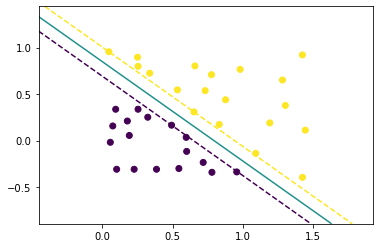

In [4]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')

x = data[:, 0:2]
y = data[:, 2]
m, n = x.shape
y = y.reshape(-1,1)
X = y*x

H = np.dot(X, X.T)*1


# converting into cvxopt format
P = matrix(H)
q = matrix(-np.ones((m, 1)))
G = matrix(-np.eye(m))
h = matrix(np.zeros(m))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))

solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

# run solver
sol = solvers.qp(P,q,G,h,A,b)
alphas = np.array(sol['x'])

# w parameter in vectorized form
w = ((y*alphas).T @ x).reshape(-1,1)

# selecting the set of indicise S corresponding 
# to non zero parameters:
threshold = 1e-4
S = (alphas > threshold).flatten()

# solve for b
b = y[S] - np.dot(x[S], w)
b = np.mean(b)

x_min = min(x[:,0])-0.5
x_max = max(x[:,0])+0.5
y_min = min(x[:,1])-0.5
y_max = max(x[:,1])+0.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)
# print(np.dot(x, d.T).shape)
Z = b + np.sum(alphas * y *np.dot(x, d.T), axis=0)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y)
ax.contour(xx, yy, Z, levels=[-1,0,1], linestyles=['--','-','--'])
plt.show()

## b) and c) : Linearly Non-separable Dataset

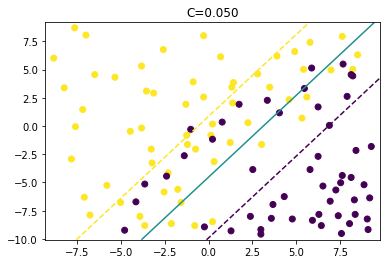

In [15]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]
y = y.reshape(-1,1)*1
#C=0.05
def lin_non_separable(C:float, x:np, y:np):
    m, n = x.shape
    X = y*x

    H = np.dot(X, X.T)*1

    # converting into cvxopt format
    P = matrix(H)
    q = matrix(-np.ones((m, 1)))
    G = matrix(np.vstack((-1*np.eye(m), np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m)*C)))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))

    solvers.options['show_progress'] = False
    solvers.options['abstol'] = 1e-10
    solvers.options['reltol'] = 1e-10
    solvers.options['feastol'] = 1e-10

    # run solver
    sol = solvers.qp(P,q,G,h,A,b)
    alphas = np.array(sol['x'])

    # w parameter in vectorized form
    w = ((y*alphas).T @ x).reshape(-1,1)

    # selecting the set of indicise S corresponding 
    # to non zero parameters:
    threshold = 1e-4
    S = (alphas > threshold).flatten()

    # solve for b
    b = y[S] - np.dot(x[S], w)
    b = np.mean(b)
    # print(b)
    
    return alphas, w, b

alphas, w, b = lin_non_separable(C=0.05, x=x, y=y)
x_min = min(x[:,0])-0.5
x_max = max(x[:,0])+0.5
y_min = min(x[:,1])-0.5
y_max = max(x[:,1])+0.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)
# print(np.dot(x, d.T).shape)
Z = b + np.sum(alphas * y *np.dot(x, d.T), axis=0)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
# ax.plot(X3,Y, 'r')
ax.scatter(x[:,0], x[:,1], c=y)
ax.contour(xx, yy, Z, levels=[-1,0,1], linestyles=['--','-','--'])
ax.set_title('C=0.050')
plt.show()


### Explain your observations here:

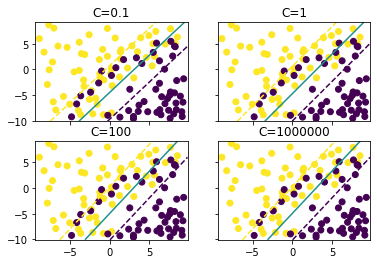

In [14]:
C_arr = [0.1,1,100,1000000]
alphas_arr = []
w_arr = []
b_arr = []
for i in range(len(C)):
    alphas, w, b = lin_non_separable(C=C_arr[i], x=x, y=y)
    alphas_arr.append(alphas)
    w_arr.append(w)
    b_arr.append(b)
x_min = min(x[:,0])-0.5
x_max = max(x[:,0])+0.5
y_min = min(x[:,1])-0.5
y_max = max(x[:,1])+0.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1)
# print(np.dot(x, d.T).shape)

Z_0 = b_arr[0] + np.sum(alphas_arr[0] * y *np.dot(x, d.T), axis=0)
Z_0 = Z_0.reshape(xx.shape)

Z_1 = b_arr[1] + np.sum(alphas_arr[1] * y *np.dot(x, d.T), axis=0)
Z_1 = Z_1.reshape(xx.shape)

Z_2 = b_arr[2] + np.sum(alphas_arr[2] * y *np.dot(x, d.T), axis=0)
Z_2 = Z_2.reshape(xx.shape)

Z_3 = b_arr[3] + np.sum(alphas_arr[3] * y *np.dot(x, d.T), axis=0)
Z_3 = Z_3.reshape(xx.shape)

fig, axs = plt.subplots(2,2)
# ax.plot(X3,Y, 'r')
axs[0,0].scatter(x[:,0], x[:,1], c=y)
axs[0,0].contour(xx, yy, Z_0, levels=[-1,0,1], linestyles=['--','-','--'])
axs[0,0].set_title('C=0.1')
axs[0,1].scatter(x[:,0], x[:,1], c=y)
axs[0,1].contour(xx, yy, Z_1, levels=[-1,0,1], linestyles=['--','-','--'])
axs[0,1].set_title('C=1')
axs[1,0].scatter(x[:,0], x[:,1], c=y)
axs[1,0].contour(xx, yy, Z_2, levels=[-1,0,1], linestyles=['--','-','--'])
axs[1,0].set_title('C=100')
axs[1,1].scatter(x[:,0], x[:,1], c=y)
axs[1,1].contour(xx, yy, Z_3, levels=[-1,0,1], linestyles=['--','-','--'])
axs[1,1].set_title('C=1000000')
for ax in axs.flat:
    ax.label_outer()
plt.show()


Changing from C=0.050 to C=0.1 decreases the width of the support vectors. Changing from C=0.1 to C=1 increases the slope of the support vectors (steeper). Changing from C=1 to C=100 decreases the width and increases the slope (steeper). There are no changes from C=100 to C=1000000. Although very slight, increasing C appears to make the support vectors more precise.